In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
# to play the audio files
from IPython.display import Audio

In [13]:
lang_audio= "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset"

In [8]:
f=0
for dirname, folder, filenames in os.walk('/kaggle/input'):
        f+= len(filenames)
print("Total samples: ",f )
print("Avg samples per language: ",f/10 )

Total samples:  256833
Avg samples per language:  25683.3


In [19]:
data_directory_list = os.listdir(lang_audio)

file_language = []
file_path = []
for dir in data_directory_list:
    language = os.listdir(lang_audio +"/"+ dir)
    file_language.append(language)
    for file in language:
        #part = file.split('.')[0]
        #part = part.split('-')
        # third part in each file represents the language associated to that file.
        
        file_path.append(lang_audio + dir + '/' + file)
        
# dataframe for languages of files
languages_df = pd.DataFrame(file_language, columns=['Languages'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
dataset_df = pd.concat([languages_df, path_df], axis=1)

# changing integers to actual emotions.
#Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
#Ravdess_df.head()

['23694.mp3', '13738.mp3', '13802.mp3', '19496.mp3', '11507.mp3', '3282.mp3', '11014.mp3', '8142.mp3', '3614.mp3', '5313.mp3', '8106.mp3', '25264.mp3', '24416.mp3', '8118.mp3', '4104.mp3', '17849.mp3', '8616.mp3', '19082.mp3', '9740.mp3', '14944.mp3', '20068.mp3', '18073.mp3', '1024.mp3', '23246.mp3', '6280.mp3', '17932.mp3', '5283.mp3', '25308.mp3', '4864.mp3', '14313.mp3', '21017.mp3', '4920.mp3', '2222.mp3', '19796.mp3', '12959.mp3', '19894.mp3', '21055.mp3', '5702.mp3', '12393.mp3', '23005.mp3', '1825.mp3', '23677.mp3', '3106.mp3', '26161.mp3', '11602.mp3', '24505.mp3', '8051.mp3', '17120.mp3', '7179.mp3', '20772.mp3', '15592.mp3', '3336.mp3', '14603.mp3', '23663.mp3', '19407.mp3', '23758.mp3', '2900.mp3', '22589.mp3', '16532.mp3', '12166.mp3', '12715.mp3', '21592.mp3', '16104.mp3', '17746.mp3', '22215.mp3', '12769.mp3', '25855.mp3', '6593.mp3', '6984.mp3', '326.mp3', '10351.mp3', '11406.mp3', '17011.mp3', '12551.mp3', '961.mp3', '12436.mp3', '36.mp3', '20918.mp3', '17705.mp3', '23

ValueError: 1 columns passed, passed data had 31960 columns

In [40]:
file_language = os.listdir(lang_audio)
file_paths = []
dir_paths=[]
for dirs in data_directory_list:
    language = os.listdir(lang_audio +"/"+ dirs)
    dir_paths.append(lang_audio +"/"+ dirs)
    for file in language:
        file_paths.append(lang_audio + dirs + '/' + file)

languages_df = pd.DataFrame(file_language, columns=['Language'])

path_df = pd.DataFrame(dir_paths, columns=['Path'])
dataset_df = pd.concat([languages_df, path_df], axis=1)


In [41]:
dataset_df

,Language,Path
0,Punjabi,/kaggle/input/audio-dataset-with-10-indian-lan...
1,Tamil,/kaggle/input/audio-dataset-with-10-indian-lan...
2,Hindi,/kaggle/input/audio-dataset-with-10-indian-lan...
3,Bengali,/kaggle/input/audio-dataset-with-10-indian-lan...
4,Telugu,/kaggle/input/audio-dataset-with-10-indian-lan...
5,Kannada,/kaggle/input/audio-dataset-with-10-indian-lan...
6,Gujarati,/kaggle/input/audio-dataset-with-10-indian-lan...
7,Urdu,/kaggle/input/audio-dataset-with-10-indian-lan...
8,Marathi,/kaggle/input/audio-dataset-with-10-indian-lan...
9,Malayalam,/kaggle/input/audio-dataset-with-10-indian-lan...


In [63]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} language'.format(e), size=15)
    plt.plot(data)    
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} language'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

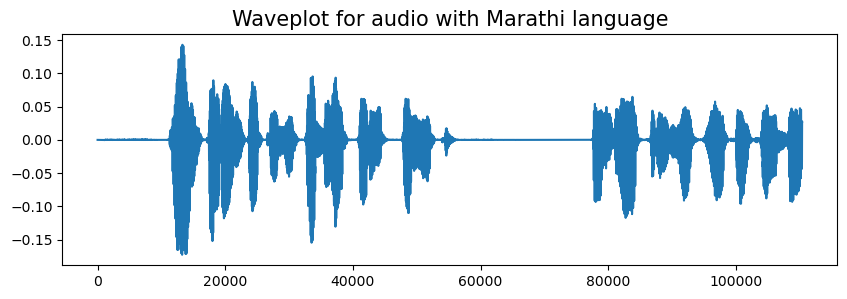

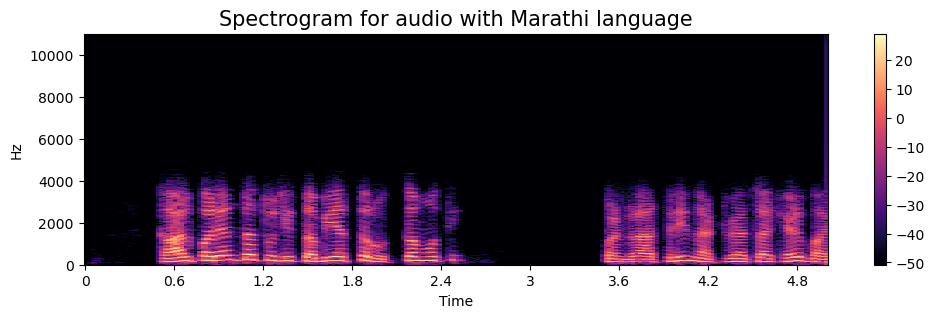

In [69]:
language='Marathi'

path = np.array(dataset_df.Path[dataset_df.Language==language])[0]
path= path +'/'+os.listdir(path)[4]

data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, language)
create_spectrogram(data, sampling_rate, language)
Audio(path)